In [1]:
import numpy as np
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
data = sns.load_dataset('iris')

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.shape

(150, 5)

In [5]:
df = torch.tensor(data.drop(columns="species").values).float()
labels = torch.zeros(len(df), dtype=torch.long)
labels[data.species == 'versicolor'] = 1 
labels[data.species == 'virginica'] = 2
print(labels)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])


In [6]:
#  model
def model_function(units):
        model = nn.Sequential(
                nn.Linear(4,units), # input layer
                nn.ReLU(), # activation function
                nn.Linear(units,units), # hidden unit
                nn.ReLU(), # activation function
                nn.Linear(units,3), # output unit
        )
        lossfn = nn.CrossEntropyLoss()
        optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
        return model, lossfn, optimizer

In [21]:
def train(x, y, nn, loss_function, opt, epochs):
    for i in range(epochs):
        
        # forward pass
        yhat = nn(x)
        
        # compute loss
        loss = loss_function(yhat, y)
        
        # backprop
        opt.zero_grad()
        loss.backward()
        opt.step()
    
    # final forward pass
    preds = nn(x)
    predlabels = torch.argmax(preds, axis=1)
    totalacc = 100*torch.mean((predlabels==labels).float())
    return totalacc

In [22]:
hiddenunits = np.arange(1, 129)
accuracy = []
for i in hiddenunits:
    model, lossfn, optimizer = model_function(i)
    acc = train(df, labels, model, lossfn, optimizer, epochs=150)
    accuracy.append(acc)

In [49]:
from torchsummary import summary
summary(model, (150,4))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1             [-1, 150, 128]             640
              ReLU-2             [-1, 150, 128]               0
            Linear-3             [-1, 150, 128]          16,512
              ReLU-4             [-1, 150, 128]               0
            Linear-5               [-1, 150, 3]             387
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.59
Params size (MB): 0.07
Estimated Total Size (MB): 0.66
----------------------------------------------------------------


Text(0, 0.5, 'accuracy')

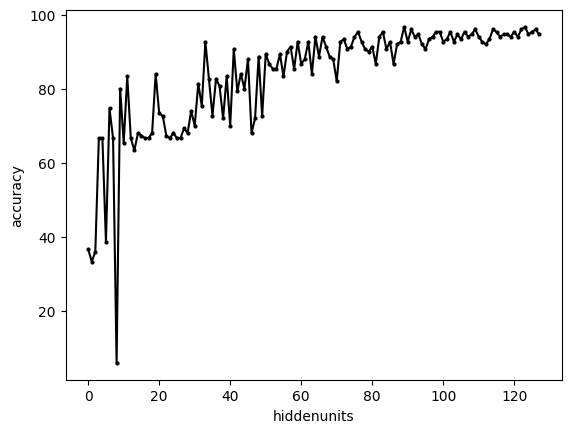

In [31]:
plt.plot(accuracy, 'ko-', markersize=2)
plt.xlabel('hiddenunits')
plt.ylabel('accuracy')